### Figure 7, 8, 10 for Siddiqui et al 

#### All the salt budget figures

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/'

ds_salt_anom_adv_decomp_Iceland_200 = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_iceland_200.nc')
ds_salt_anom_adv_decomp_SPNA_200 = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_SPNA_200.nc')
ds_SPNA_anom = xr.open_dataset(data_dir+'SPNA_basin_anom_budgS_200_ts.nc')
ds_iceland_anom = xr.open_dataset(data_dir+'iceland_basin_anom_budgS_200_ts(1).nc')
ds_mxld_spna = xr.open_dataset(data_dir+'eccov4r4_mxld_spna.nc')
ds_mxld_iceland_basin = xr.open_dataset(data_dir+'eccov4r4_mxld_iceland_basin.nc')
ds_salt_anom_65_200 = xr.open_dataset(data_dir+'SPNA_northface_adv.nc')

In [5]:
ds_salt_anom_65_200

<xarray.Dataset>
Dimensions:                        (time: 310)
Coordinates:
  * time                           (time) datetime64[ns] 1992-02-15T12:00:00 ...
    timestep                       (time) int64 ...
    dt                             (time) float64 ...
    month                          (time) int64 ...
Data variables:
    __xarray_dataarray_variable__  (time) float64 ...

### Anomaly budget for SPNA and Iceland basin

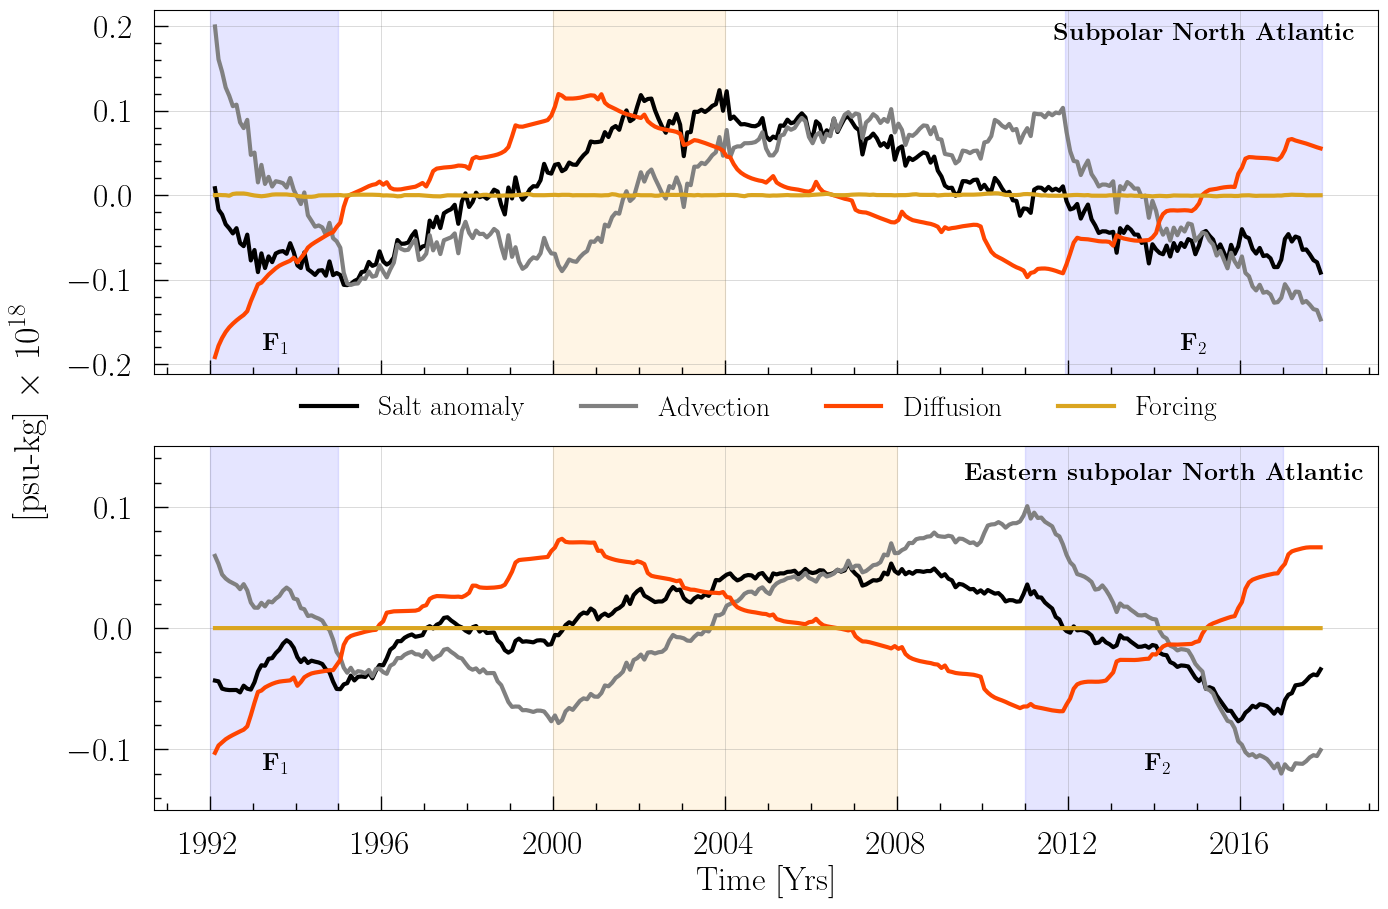

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_tnd*1e-18, lw=3, color='black',label=r'Salt anomaly')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_adv*1e-18, lw=3, color='grey',label=r'Advection')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_dif*1e-18, lw=3, color='orangered',label=r'Diffusion')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_frc*1e-18, lw=3, color='goldenrod',label=r'Forcing')
#axs[0].plot(ds_salt_anom_65_200.time, ds_salt_anom_65_200.__xarray_dataarray_variable__*1e-12, lw=3, color='blue',label=r'65$^{\circ}$N Advection')


#plt.ylim([-0.8,0.8])
axs[0].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.1, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, lw=3, color='black',label=r'$\mathcal{T}$')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_adv*1e-18, lw=3, color='grey',label=r'$\mathcal{A}$')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_dif*1e-18, lw=3, color='orangered',label=r'$\mathcal{M}$')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_frc*1e-18, lw=3, color='goldenrod',label=r'$\mathcal{F}$')

axs[1].set_ylim([-0.15,0.15])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)
plt.figtext(0.16,0.56, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.67,0.56, r'\textbf{F$_2$}', fontsize=18)
plt.figtext(0.16,0.14, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.65,0.14, r'\textbf{F$_2$}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2011-01',xmax='2017-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)

plt.savefig('figs/Fig_7a.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)


### Advection decomposition

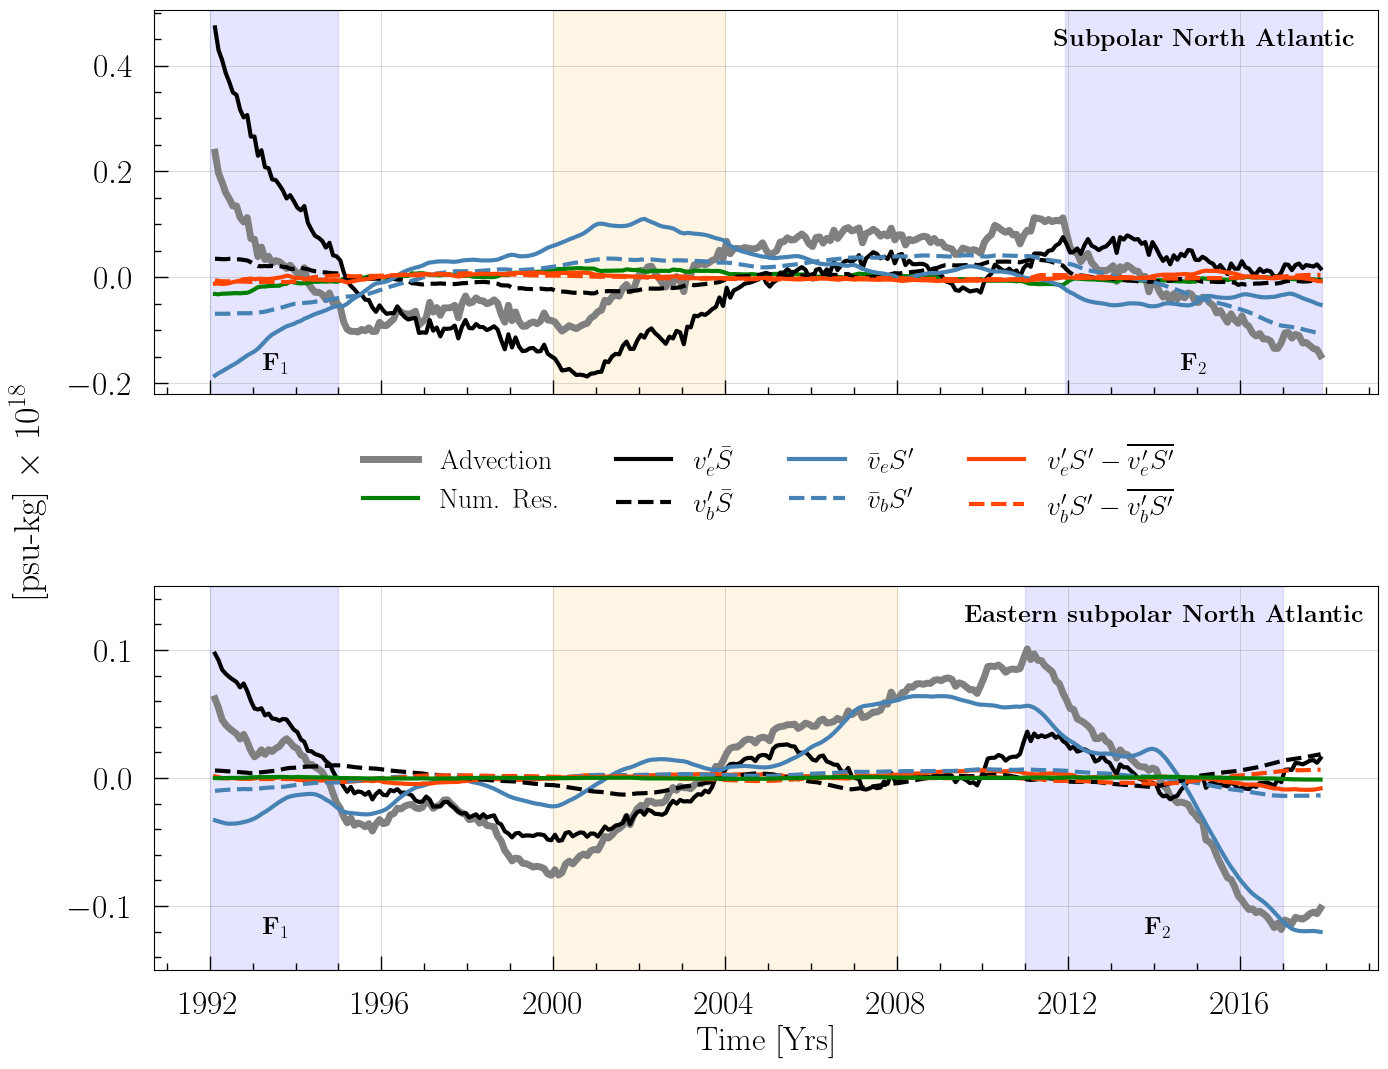

In [15]:

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,12))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')

axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, ds_salt_anom_adv_decomp_SPNA_200.S_adv*1e-18, lw=5, color='grey',label=r'Advection')
# residual
axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, ds_salt_anom_adv_decomp_SPNA_200.S_res_num*1e-18, lw=3, color='g',
         label=r'Num. Res.')

axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uanom_Sclim_eul)*1e-18, lw=3, color='black',
         label=r'$v^\prime_e\bar{S}$')
axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uanom_Sclim_bol)*1e-18,  linestyle='dashed',lw=3, color='black',
         label=r'$v^\prime_b\bar{S}$')

axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uclim_Sanom_eul)*1e-18, lw=3, color='steelblue',
         label=r'$\bar{v}_e S^\prime$')
axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uclim_Sanom_bol)*1e-18,  linestyle='dashed',lw=3, color='steelblue',
         label=r'$\bar{v}_b S^\prime$')

axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uanom_Sanom_eul)*1e-18, lw=3, color='orangered',
label=r'$v^\prime_eS^\prime -\overline{v^\prime_eS^\prime}$')
axs[0].plot(ds_salt_anom_adv_decomp_SPNA_200.time, (ds_salt_anom_adv_decomp_SPNA_200.Uanom_Sanom_bol)*1e-18,  linestyle='dashed',lw=3, color='orangered',
label=r'$v^\prime_bS^\prime - \overline{v^\prime_bS^\prime}$')


#plt.ylim([-0.8,0.8])
axs[0].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.15, -0.4),frameon=False,fontsize=20)

fig.supylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')

axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, ds_salt_anom_adv_decomp_Iceland_200.S_adv*1e-18, lw=5, color='grey',label=r'Advection')
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uanom_Sclim_eul)*1e-18, lw=3, color='black',
         label=r'$\mathbf{u}^{\prime} \cdot \overline{\nabla S}$')
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uclim_Sanom_eul)*1e-18, lw=3, color='steelblue',
         label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$')
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uanom_Sanom_eul)*1e-18, lw=3, color='orangered',
label=r'$\nabla \cdot ({\mathbf{u}}^{\prime}\,S^{\prime}-\overline{\mathbf{u}^{\prime}\,S^{\prime}})$')

axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uanom_Sclim_bol)*1e-18,  linestyle='dashed',lw=3, color='black',
         label=r'$\mathbf{u}^{\prime} \cdot \overline{\nabla S}$')
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uclim_Sanom_bol)*1e-18,  linestyle='dashed',lw=3, color='steelblue',
         label=r'$\overline{\mathbf{u}}\cdot\nabla S^{\prime}$')
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, (ds_salt_anom_adv_decomp_Iceland_200.Uanom_Sanom_bol)*1e-18,  linestyle='dashed',lw=3, color='orangered',
label=r'$\nabla \cdot ({\mathbf{u}}^{\prime}\,S^{\prime}-\overline{\mathbf{u}^{\prime}\,S^{\prime}})$')


# Plotting the residual
axs[1].plot(ds_salt_anom_adv_decomp_Iceland_200.time, ds_salt_anom_adv_decomp_Iceland_200.S_res_num*1e-18, lw=3, color='g',
         label=r'Num. Res.')


axs[1].set_ylim([-0.15,0.15])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9,
                   hspace=0.5)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
plt.figtext(0.55,0.39, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)
plt.figtext(0.16,0.6, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.67,0.6, r'\textbf{F$_2$}', fontsize=18)
plt.figtext(0.16,0.13, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.65,0.13, r'\textbf{F$_2$}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2011-01',xmax='2017-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)

plt.savefig('figs/Fig_7b.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)



### Decomposing Diffusion

In [7]:
ds_mxld_iceland_basin

<xarray.Dataset>
Dimensions:   (time: 310)
Coordinates:
  * time      (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
Data variables:
    MXLDEPTH  (time) float32 ...

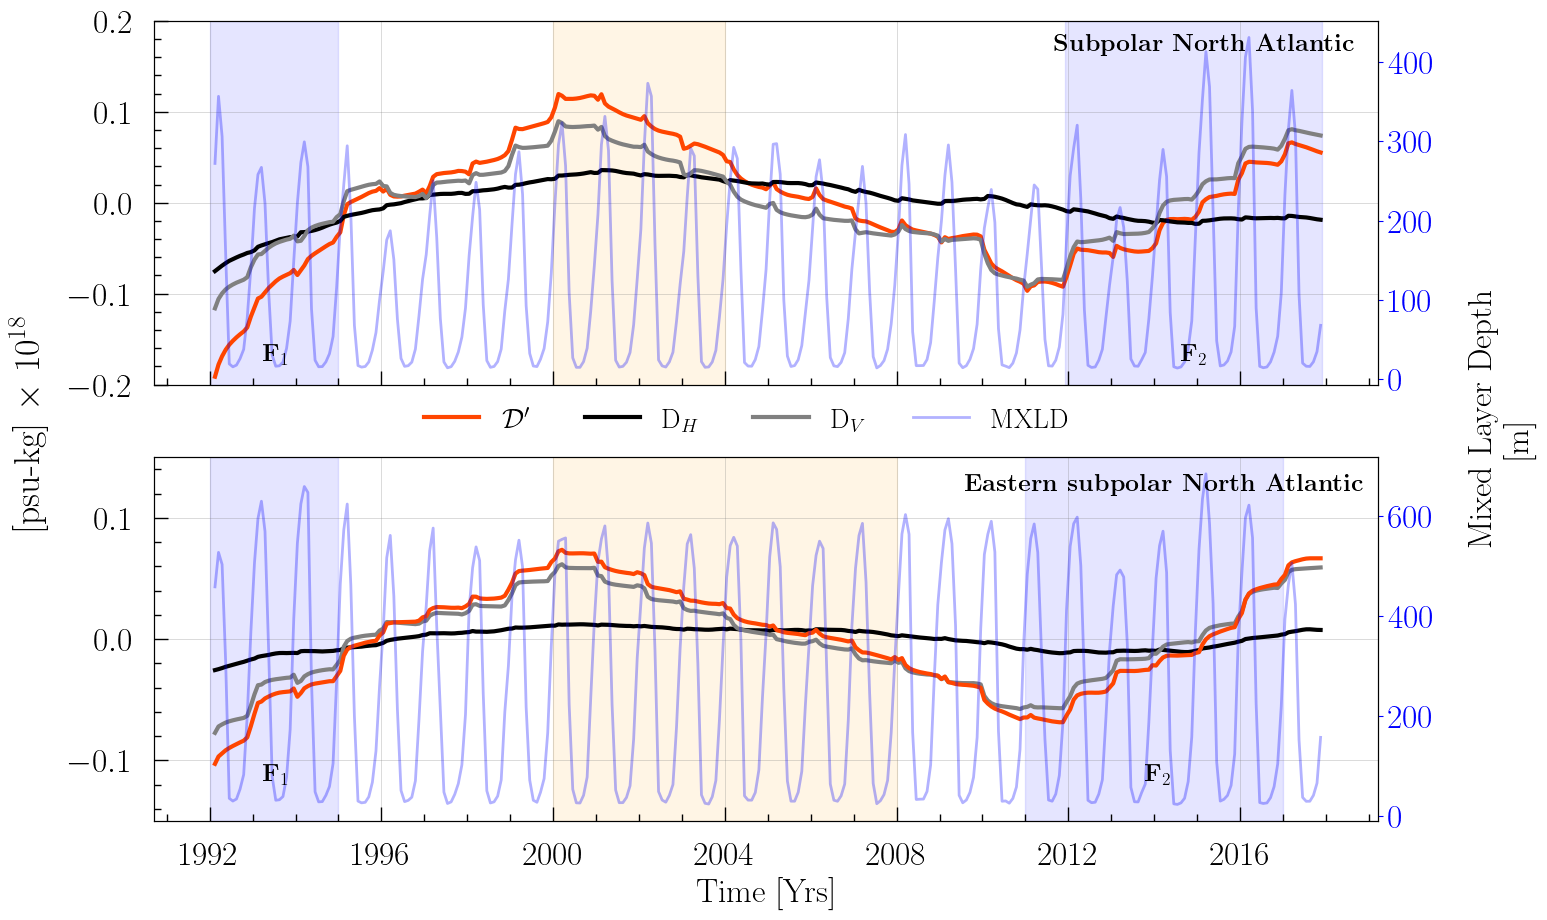

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_dif*1e-18, lw=3, color='orangered',label=r'$\mathcal{D}^\prime$')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_hdif*1e-18, lw=3, color='black',label=r'D$_{H}$')
axs[0].plot(ds_SPNA_anom.time, ds_SPNA_anom.S_vdif*1e-18, lw=3, color='grey',label=r'D$_{V}$')
axs2 = axs[0].twinx()
axs2.plot(ds_mxld_spna.time, ds_mxld_spna.MXLDEPTH, lw=2, alpha=0.3, color='blue',label=r'MXLD')
axs2.tick_params(axis='y', labelcolor='b', color='b')

axs[0].legend(loc='lower left', ncol=3, bbox_to_anchor=(0.2, -0.2),frameon=False,fontsize=20)
axs2.legend(loc='lower left', ncol=1, bbox_to_anchor=(0.6, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)

axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
axs[0].set_ylim([-0.2,0.2])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_hdif*1e-18, lw=3, color='black',label=r'$\mathcal{H}$')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_vdif*1e-18, lw=3, color='grey',label=r'$\mathcal{V}$')
axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_dif*1e-18, lw=3, color='orangered',label=r'$\mathcal{D}$')
axs3 = axs[1].twinx()
axs3.plot(ds_mxld_iceland_basin.time, ds_mxld_iceland_basin.MXLDEPTH, lw=2, alpha=0.3, color='blue',label=r'MXLD')
axs3.tick_params(axis='y', labelcolor='b', color='b')

axs[1].set_ylim([-0.15,0.15])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)
plt.figtext(0.83,0.38, 'Mixed Layer Depth', rotation='vertical', fontsize=24)
plt.figtext(0.85,0.47, '[m]', rotation='vertical', fontsize=24)
plt.figtext(0.16,0.56, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.67,0.56, r'\textbf{F$_2$}', fontsize=18)
plt.figtext(0.16,0.14, r'\textbf{F$_1$}', fontsize=18)
plt.figtext(0.65,0.14, r'\textbf{F$_2$}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2011-01',xmax='2017-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)

plt.savefig('figs/Fig_7c.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)